In [11]:
from pygmo import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#verbosity
v=15
#generations
g=100
#population
popl=20

In [18]:
#the rosenbrock function (used as a test problem/fn in optimization)

def rosenbrockfn(x,y):
    return ((1-x**2)+100*((y-x**2)**2))

In [21]:
#in 2 dims the solution is 1 and 1 for min=0

rosenbrockfn(1,1)

In [ ]:
#full set of parameters for reference

#algo = algorithm(sga(gen = 500,
#                     cr = .90, eta_c = 1., m = 0.02, 
#                     param_m = 1., param_s = 2, 
#                     crossover = "exponential", mutation = "polynomial", selection = "tournament", 
#                     seed = random)

[1, 16, 31, 46, 61, 76] [14.35036264304554, 12.359112860246512, 0.5366419557379429, 0.5366419557379429, 0.5366419557379429, 0.5366419557379429]


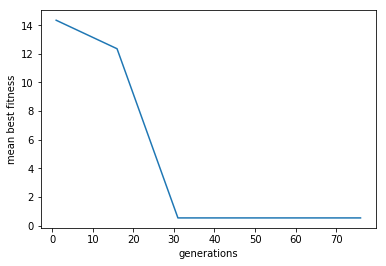

In [20]:
#ex 1: a single run using the pygmo.sga lib for genetic algo to find the optimal solution for the rosenbrock fn

algo = algorithm(sga(gen = g))
algo.set_verbosity(v)
prob = problem(rosenbrock(dim = 2))
pop = population(prob, 10)
pop = algo.evolve(pop) 

#the output and visualization for above

uda = algo.extract(sga)
uda.get_log()

gen=[]
best=[]
uda = algo.extract(sga)
for i in range(0,int(g/v)):
    elem=uda.get_log()[i]
    gen.append(elem[0])
    best.append(elem[2])

plt.plot(gen,best)
plt.xlabel('generations')
plt.ylabel('mean best fitness')
print(gen,best)

Population= 2 Mean fit 559.646104573913
Population= 30 Mean fit 9.45544179437512
Population= 50 Mean fit 0.7202175993157521
Population= 100 Mean fit 0.21902021076200676


Text(0,0.5,'mean best fitness')

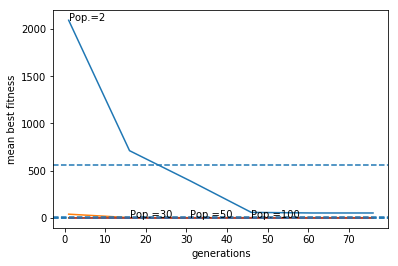

In [22]:
#PSO for population [10,30,50,100] & constant dimension(2) & generation(100)


count=0
for p in [2,30,50,100]:
    algo = algorithm(sga(gen = g))
    algo.set_verbosity(v)
    prob = problem(rosenbrock(2))
    pop = population(prob, p)
    pop = algo.evolve(pop)

    #output/log and visualization
    gen=[]
    best=[]  
    udaLog = algo.extract(sga)
    for i in range(0,int(g/v)):
        logRow=udaLog.get_log()[i]
        gen.append(logRow[0])
        best.append(logRow[2])
    
    print('Population=',p,'Mean fit',np.mean(best))
    
    plt.plot(gen,best)
    plt.axhline(y=np.mean(best), linestyle='--',label='Pop.=%s'%(p))
    plt.text(gen[count],best[count],'Pop.=%s'%(p))
    count+=1

#visualization

plt.xlabel('generations')
plt.ylabel('mean best fitness')

CrossverP= 0.95 MutationP= 0.050000000000000044 Mean fit 25.617030930847758
CrossverP= 0.94 MutationP= 0.06000000000000005 Mean fit 26.72746234444521
CrossverP= 0.93 MutationP= 0.06999999999999995 Mean fit 29.02979486808812
CrossverP= 0.92 MutationP= 0.07999999999999996 Mean fit 12.538044168618768
CrossverP= 0.91 MutationP= 0.08999999999999997 Mean fit 3.8954941342911606
CrossverP= 0.9 MutationP= 0.09999999999999998 Mean fit 64.26391257430858
CrossverP= 0.89 MutationP= 0.10999999999999999 Mean fit 199.68586934223012
CrossverP= 0.88 MutationP= 0.12 Mean fit 6.933101450470038
CrossverP= 0.87 MutationP= 0.13 Mean fit 1.2223300558158618
CrossverP= 0.86 MutationP= 0.14 Mean fit 1.0390800598534216
CrossverP= 0.85 MutationP= 0.15000000000000002 Mean fit 3.3941176392157497


Text(0,0.5,'mean best fitness')

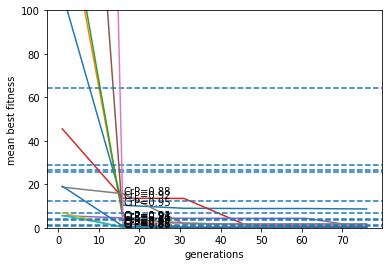

In [33]:
#ex 2: effect of modifying mutation prob. and crossover prob. (constant population =20, and dim=2)

algo = algorithm(sga(gen = g, cr = .90, m = 0.10))
algo.set_verbosity(v)
prob = problem(rosenbrock(dim = 2))
pop = population(prob, 10)
pop = algo.evolve(pop) 


count=0
for c in [0.95,0.94,0.93,0.92,0.91,0.90,0.89,0.88,0.87,0.86,0.85]:
    algo = algorithm(sga(gen = g, cr = c, m = 1-c))
    algo.set_verbosity(v)
    prob = problem(rosenbrock(2))
    pop = population(prob, popl)
    pop = algo.evolve(pop)

    #output/log and visualization
    gen=[]
    best=[]  
    udaLog = algo.extract(sga)
    for i in range(0,int(g/v)):
        logRow=udaLog.get_log()[i]
        gen.append(logRow[0])
        best.append(logRow[2])
    
    print('CrossverP=',c,'MutationP=',1-c,'Mean fit',np.mean(best))
    
    plt.plot(gen,best)
    plt.ylim(0,100)
    plt.axhline(y=np.mean(best), linestyle='--')
    plt.text(gen[1],best[1],'CrP=%s'%(c))
    count+=1

#visualization

plt.xlabel('generations')
plt.ylabel('mean best fitness')

In [ ]:
#ex 3: effect of the different operators [constant population(20) and dimension(2)]
#in each case the non-specified parameter is left as the lib default

Crossver Strategy= exponential Mean fit 13.605079304068338
Crossver Strategy= binomial Mean fit 50.7384069933963
Crossver Strategy= single Mean fit 10.108606073793519
Crossver Strategy= sbx Mean fit 1.4320748894089952


Text(0,0.5,'mean best fitness')

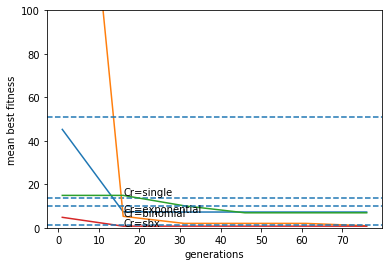

In [35]:
#crossover strategy effect
count=0
for op in ["exponential","binomial","single","sbx"]:
    algo = algorithm(sga(gen = g, crossover = op, selection = "tournament"))
    algo.set_verbosity(v)
    prob = problem(rosenbrock(2))
    pop = population(prob, popl)
    pop = algo.evolve(pop)

    #output/log and visualization
    gen=[]
    best=[]  
    udaLog = algo.extract(sga)
    for i in range(0,int(g/v)):
        logRow=udaLog.get_log()[i]
        gen.append(logRow[0])
        best.append(logRow[2])
    
    print('Crossver Strategy=',op, 'Mean fit',np.mean(best))
    
    plt.plot(gen,best)
    plt.ylim(0,100)
    plt.axhline(y=np.mean(best), linestyle='--')
    plt.text(gen[1],best[1],'Cr=%s'%(op))
    count+=1

#visualization

plt.xlabel('generations')
plt.ylabel('mean best fitness')

Mutation Strategy= gaussian Mean fit 20.20444694242416
Mutation Strategy= polynomial Mean fit 21.76168365627123
Mutation Strategy= uniform Mean fit 53.0814659331285


Text(0,0.5,'mean best fitness')

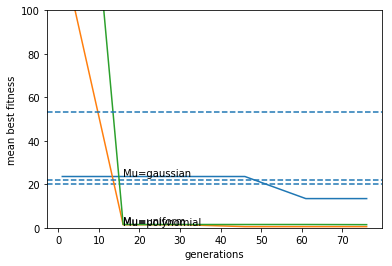

In [37]:
#mutation strategy effect (this library had only the 'tournament' for the selection parameter)
count=0
for op in ["gaussian","polynomial","uniform"]:
    algo = algorithm(sga(gen = g, mutation = op, selection = "tournament"))
    algo.set_verbosity(v)
    prob = problem(rosenbrock(2))
    pop = population(prob, popl)
    pop = algo.evolve(pop)

    #output/log and visualization
    gen=[]
    best=[]  
    udaLog = algo.extract(sga)
    for i in range(0,int(g/v)):
        logRow=udaLog.get_log()[i]
        gen.append(logRow[0])
        best.append(logRow[2])
    
    print('Mutation Strategy=',op, 'Mean fit',np.mean(best))
    
    plt.plot(gen,best)
    plt.ylim(0,100)
    plt.axhline(y=np.mean(best), linestyle='--')
    plt.text(gen[1],best[1],'Mu=%s'%(op))
    count+=1

#visualization

plt.xlabel('generations')
plt.ylabel('mean best fitness')

Dimension= 5 Mean fit 2642.6492427903386
Dimension= 10 Mean fit 32047.461922713843
Dimension= 50 Mean fit 1116760.1720760101
Dimension= 100 Mean fit 2969246.766910517
Dimension= 1000 Mean fit 91132267.886546


Text(0,0.5,'mean best fitness')

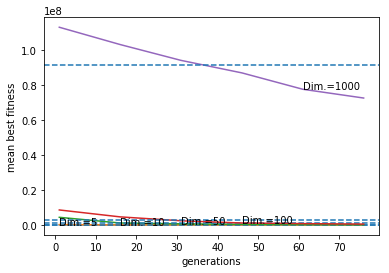

In [41]:
#ex 4: sga for dimension [5,10,50,100,1000] & constant population(20) & generation=d*50
#!! even if i try with a constant generation=100, i get pretty much the same results

count=0
for d in [5,10,50,100,1000]:
    algo = algorithm(sga(gen = d*50))
    algo.set_verbosity(v)
    prob = problem(rosenbrock(d))
    pop = population(prob, popl)
    pop = algo.evolve(pop)

    #output/log and visualization
    gen=[]
    best=[]  
    udaLog = algo.extract(sga)
    for i in range(0,int(g/v)):
        logRow=udaLog.get_log()[i]
        gen.append(logRow[0])
        best.append(logRow[2])
    
    print('Dimension=',d,'Mean fit',np.mean(best))
    
    plt.plot(gen,best)
    plt.axhline(y=np.mean(best), linestyle='--',label='Dim.=%s'%(d))
    plt.text(gen[count],best[count],'Dim.=%s'%(d))
    count+=1

#visualization

plt.xlabel('generations')
plt.ylabel('mean best fitness')